# Carregando dados

[Download dos datasets](https://www.kaggle.com/rounakbanik/the-movies-dataset/data)

## Carregando dados dos filmes

In [0]:
import pandas as pd

In [0]:
filmes_df = pd.read_csv("https://raw.githubusercontent.com/SrDiegoH/DataScience/master/machine-learning-algoritmos-nao-supervisionados/movies.csv")

filmes_df.columns = ["filmeId", "titulo", "generos"]
filmes_df = filmes_df.set_index("filmeId")

filmes_df.head(7)

,titulo,generos
filmeId,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,Jumanji (1995),Adventure|Children|Fantasy
3,Grumpier Old Men (1995),Comedy|Romance
4,Waiting to Exhale (1995),Comedy|Drama|Romance
5,Father of the Bride Part II (1995),Comedy
6,Heat (1995),Action|Crime|Thriller
7,Sabrina (1995),Comedy|Romance


## Carregado dados das notas dos filmes

In [0]:
notas_df = pd.read_csv("https://raw.githubusercontent.com/SrDiegoH/DataScience/master/introducao-a-sistemas-de-recomendacao-com-python/ratings.csv")

notas_df.columns = ["usuarioId", "filmeId", "nota", "momento"]

notas_df.head(7)

,usuarioId,filmeId,nota,momento
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205
5,1,1263,2.0,1260759151
6,1,1287,2.0,1260759187


Descrevendo relações entre as variáveis

In [0]:
notas_df.describe()

,usuarioId,filmeId,nota,momento
count,100004.000000,100004.000000,100004.000000,1.000040e+05
mean,347.011310,12548.664363,3.543608,1.129639e+09
std,195.163838,26369.198969,1.058064,1.916858e+08
min,1.000000,1.000000,0.500000,7.896520e+08
25%,182.000000,1028.000000,3.000000,9.658478e+08
50%,367.000000,2406.500000,4.000000,1.110422e+09
75%,520.000000,5418.000000,4.000000,1.296192e+09
max,671.000000,163949.000000,5.000000,1.476641e+09


## Recomendando com base no total de votos

Adicionando total de votos no Data frame dos filmes

In [0]:
total_de_votos = notas_df["filmeId"].value_counts()

total_de_votos.head(7)

356     341
296     324
318     311
593     304
260     291
480     274
2571    259
Name: filmeId, dtype: int64

In [0]:
filmes_df['total_de_votos'] = total_de_votos

filmes_df.head(7)

,titulo,generos,total_de_votos
filmeId,,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,247.0
2,Jumanji (1995),Adventure|Children|Fantasy,107.0
3,Grumpier Old Men (1995),Comedy|Romance,59.0
4,Waiting to Exhale (1995),Comedy|Drama|Romance,13.0
5,Father of the Bride Part II (1995),Comedy,56.0
6,Heat (1995),Action|Crime|Thriller,104.0
7,Sabrina (1995),Comedy|Romance,53.0


In [0]:
filmes_df.sort_values("total_de_votos", ascending = False).head(7)

,titulo,generos,total_de_votos
filmeId,,,
356,Forrest Gump (1994),Comedy|Drama|Romance|War,341.0
296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,324.0
318,"Shawshank Redemption, The (1994)",Crime|Drama,311.0
593,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller,304.0
260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi,291.0
480,Jurassic Park (1993),Action|Adventure|Sci-Fi|Thriller,274.0
2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,259.0


Obtendo média das notas

In [0]:
notas_medias = notas_df.groupby("filmeId").mean()["nota"]

notas_medias.head(7)

filmeId
1    3.872470
2    3.401869
3    3.161017
4    2.384615
5    3.267857
6    3.884615
7    3.283019
Name: nota, dtype: float64

In [0]:
filmes_df["nota_media"] = notas_medias

filmes_df.sort_values("total_de_votos", ascending = False).head(7)

,titulo,generos,total_de_votos,nota_media
filmeId,,,,
356,Forrest Gump (1994),Comedy|Drama|Romance|War,341.0,4.054252
296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,324.0,4.256173
318,"Shawshank Redemption, The (1994)",Crime|Drama,311.0,4.487138
593,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller,304.0,4.138158
260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi,291.0,4.221649
480,Jurassic Park (1993),Action|Adventure|Sci-Fi|Thriller,274.0,3.706204
2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,259.0,4.183398


Filtrando médias de acordo com as notas médias

In [0]:
filmes_df.sort_values("nota_media", ascending = False).head(7)

,titulo,generos,total_de_votos,nota_media
filmeId,,,,
3447,"Good Earth, The (1937)",Drama,1.0,5.0
2837,Bedrooms & Hallways (1998),Comedy|Romance,1.0,5.0
4626,Miracle Mile (1989),Drama|Romance|Sci-Fi,1.0,5.0
129514,George Carlin: It's Bad for Ya! (2008),Comedy,1.0,5.0
129313,Reality (2014),Comedy,1.0,5.0
128620,Victoria (2015),Crime|Drama|Romance,1.0,5.0
7564,Kwaidan (Kaidan) (1964),Horror,1.0,5.0


In [0]:
filmes_df.query("total_de_votos >= 10").sort_values("nota_media", ascending = False).head(7)

,titulo,generos,total_de_votos,nota_media
filmeId,,,,
1939,"Best Years of Our Lives, The (1946)",Drama|War,11.0,4.636364
3469,Inherit the Wind (1960),Drama,12.0,4.541667
858,"Godfather, The (1972)",Crime|Drama,200.0,4.487500
318,"Shawshank Redemption, The (1994)",Crime|Drama,311.0,4.487138
1948,Tom Jones (1963),Adventure|Comedy|Romance,12.0,4.458333
8132,Gladiator (1992),Action|Drama,11.0,4.454545
1945,On the Waterfront (1954),Crime|Drama,29.0,4.448276


In [0]:
filmes_com_mais_de_50_votos = filmes_df.query("total_de_votos >= 50")

filmes_com_mais_de_50_votos.sort_values("nota_media", ascending = False).head(7)

,titulo,generos,total_de_votos,nota_media
filmeId,,,,
858,"Godfather, The (1972)",Crime|Drama,200.0,4.487500
318,"Shawshank Redemption, The (1994)",Crime|Drama,311.0,4.487138
969,"African Queen, The (1951)",Adventure|Comedy|Romance|War,50.0,4.420000
913,"Maltese Falcon, The (1941)",Film-Noir|Mystery,62.0,4.387097
1221,"Godfather: Part II, The (1974)",Crime|Drama,135.0,4.385185
50,"Usual Suspects, The (1995)",Crime|Mystery|Thriller,201.0,4.370647
1228,Raging Bull (1980),Drama,50.0,4.350000


In [0]:
filmes_assistidos = [1, 21, 19, 10, 11, 7, 2]

filmes_df.loc[filmes_assistidos]

,titulo,generos,total_de_votos,nota_media
filmeId,,,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,247.0,3.872470
21,Get Shorty (1995),Comedy|Crime|Thriller,95.0,3.536842
19,Ace Ventura: When Nature Calls (1995),Comedy,92.0,2.597826
10,GoldenEye (1995),Action|Adventure|Thriller,122.0,3.450820
11,"American President, The (1995)",Comedy|Drama|Romance,82.0,3.689024
7,Sabrina (1995),Comedy|Romance,53.0,3.283019
2,Jumanji (1995),Adventure|Children|Fantasy,107.0,3.401869


In [0]:
aventura_infantil_e_fantasia_com_mais_de_50_votos = filmes_com_mais_de_50_votos.query("generos=='Adventure|Children|Fantasy'")

aventura_infantil_e_fantasia_com_mais_de_50_votos.drop(filmes_assistidos, errors='ignore').sort_values("nota_media", ascending = False).head(7)

,titulo,generos,total_de_votos,nota_media
filmeId,,,,
4896,Harry Potter and the Sorcerer's Stone (a.k.a. ...,Adventure|Children|Fantasy,105.0,3.657143


# Recomendando com base em usuários com gostos parecidos

## Exemplificando distancia entre usuarios

Exemplos a seguir de usuarios com gostos parecidos:

* João:  toy story -> 4
* Maria: toy story -> 5
* Paulo: toy story -> 3
* Joana: toy story -> 3.5

In [0]:
import matplotlib.pyplot as plt

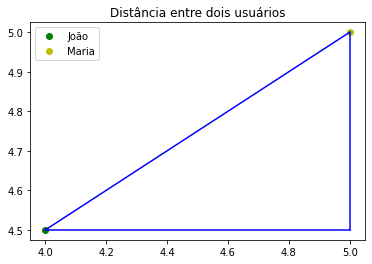

In [0]:
plt.plot(4, 4.5, "go")
plt.plot(5, 5, "yo")

plt.title("Distância entre dois usuários")
plt.legend(["João", "Maria"])

# Gerando linhas para ficar mais descritivo
plt.plot([4, 5], [4.5, 4.5], color="b", linestyle="-")
plt.plot([4, 5], [4.5, 5],   color="b", linestyle="-")
plt.plot([5, 5], [4.5, 5],   color="b", linestyle="-")

In [0]:
import numpy as np

In [0]:
joao = np.array([4, 4.5])
maria = np.array([5, 5])

print(f"Distâncias entre os dois pontos: {joao - maria}")

Distâncias entre os dois pontos: [-1.  -0.5]


In [0]:
from math import sqrt

In [0]:
def dist_pitagoras(a,b):
  return np.linalg.norm(a - b)

In [0]:
dist_pitagoras(joao, maria)

1.118033988749895

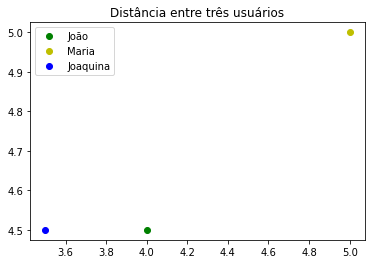

In [0]:
plt.plot(4, 4.5, "go")
plt.plot(5, 5, "yo")
plt.plot(3.5, 4.5, "bo")

plt.title("Distância entre três usuários")
plt.legend(["João", "Maria", "Joaquina"])

In [0]:
joaquina = np.array([3.5, 4.5])

In [0]:
print(f"Distância entre João e Maria: {dist_pitagoras(joao, maria).round(3)}")
print(f"Distância entre João e Joaquina: {dist_pitagoras(joao, joaquina).round(3)}")

Distância entre João e Maria: 1.118
Distância entre João e Joaquina: 0.5


## Distância entre usuários do Dataset

In [0]:
def distancia_de_vetores(a,b):
  return np.linalg.norm(a - b)

In [0]:
def notas_do_usuario(usuario_Id):
  notas_do_usuario = notas_df.query(f"usuarioId=={usuario_Id}")
  notas_do_usuario = notas_do_usuario[["filmeId", "nota"]].set_index("filmeId")
  return notas_do_usuario

In [0]:
usuario_1 = notas_do_usuario(1)
usuario_4 = notas_do_usuario(4)

In [0]:
usuario_1.head(7)

,nota
filmeId,
31,2.5
1029,3.0
1061,3.0
1129,2.0
1172,4.0
1263,2.0
1287,2.0


In [0]:
diferencas_entre_usuarios = usuario_1.join(usuario_4, lsuffix="_esquerda", rsuffix="_direita").dropna()

distancia_de_vetores(diferencas_entre_usuarios['nota_esquerda'], diferencas_entre_usuarios['nota_direita'])

4.5

In [0]:
def distancia_de_usuarios(usuario_id_1, usuario_id_2):
  notas_1 = notas_do_usuario(usuario_id_1)
  notas_2 = notas_do_usuario(usuario_id_2)

  diferencas = notas_1.join(notas_2, lsuffix="_esquerda", rsuffix="_direita").dropna()

  distancia =  distancia_de_vetores(diferencas['nota_esquerda'], diferencas['nota_direita'])

  return [usuario_id_1, usuario_id_2, distancia]

In [0]:
distancia_de_usuarios(1, 4)

[1, 4, 4.5]

In [0]:
quantidade_de_usuarios = len(notas_df['usuarioId'].unique())

print(f"Quantidade de usuários: {quantidade_de_usuarios}")

Quantidade de usuários: 671


In [0]:
def distancia_de_todos(id_referencia):
  todos_os_usuarios = notas_df['usuarioId'].unique()

  distancias = [distancia_de_usuarios(id_referencia, usuario_id) for usuario_id in todos_os_usuarios]

  distancias = pd.DataFrame(distancias, columns = ["usuario_referencia", "outro_usuario", "distancia"])

  return distancias

In [0]:
distancia_de_todos(1).head(7)

,usuario_referencia,outro_usuario,distancia
0,1,1,0.000000
1,1,2,0.000000
2,1,3,0.000000
3,1,4,4.500000
4,1,5,2.000000
5,1,6,0.000000
6,1,7,4.636809


In [0]:
notas_do_usuario(1).join(notas_do_usuario(5), lsuffix="_1", rsuffix="5").dropna()

,nota_1,nota5
filmeId,,
2294,2.0,4.0


In [0]:
notas_do_usuario(1).join(notas_do_usuario(2), lsuffix="_1", rsuffix="2").dropna()

,nota_1,nota2
filmeId,,


## Distanciar usuários sem filmes em comum

In [0]:
def distancia_de_usuarios(usuario_id_1, usuario_id_2, diff_minima = 5):
  notas_1 = notas_do_usuario(usuario_id_1)
  notas_2 = notas_do_usuario(usuario_id_2)

  diferencas = notas_1.join(notas_2, lsuffix="_esquerda", rsuffix="_direita").dropna()
  
  if(len(diferencas) < diff_minima):
    return [usuario_id_1, usuario_id_2, 100000]
  
  distancia =  distancia_de_vetores(diferencas['nota_esquerda'], diferencas['nota_direita'])
  return [usuario_id_1, usuario_id_2, distancia]

In [0]:
distancia_de_todos(1).head()

,usuario_referencia,outro_usuario,distancia
0,1,1,0.0
1,1,2,100000.0
2,1,3,100000.0
3,1,4,4.5
4,1,5,100000.0


In [0]:
def mais_proximos_de(id_referencia):
  distancias = distancia_de_todos(id_referencia)

  distancias = distancias.sort_values("distancia")
  distancias = distancias.set_index("outro_usuario").drop(id_referencia)

  return distancias

In [0]:
mais_proximos_de(1).head(7)

,usuario_referencia,distancia
outro_usuario,,
294,1,1.936492
150,1,2.061553
533,1,2.345208
285,1,2.549510
634,1,2.692582
514,1,2.738613
463,1,2.958040


Refatorando métodos aicionando parâmetros de teste

In [0]:
def mais_proximos_de(id_referencia, n=None):
  distancias = distancia_de_todos(id_referencia, n=n)

  distancias = distancias.sort_values("distancia")
  distancias = distancias.set_index("outro_usuario").drop(id_referencia)

  return distancias

In [0]:
def distancia_de_todos(id_referencia, n=None):
  todos_os_usuarios = notas_df['usuarioId'].unique()

  if n:
    todos_os_usuarios = todos_os_usuarios[:n]
    
  distancias = [distancia_de_usuarios(id_referencia, usuario_id) for usuario_id in todos_os_usuarios]
  distancias = pd.DataFrame(distancias, columns = ["usuario_referencia", "outro_usuario", "distancia"])

  return distancias

In [0]:
mais_proximos_de(1, n=50).head(7)

,usuario_referencia,distancia
outro_usuario,,
34,1,4.153312
15,1,4.153312
4,1,4.500000
23,1,4.527693
7,1,4.636809
19,1,4.847680
30,1,5.024938


In [0]:
def distancia_de_usuarios(usuario_id_1, usuario_id_2, diff_minima=5):
  notas_1 = notas_do_usuario(usuario_id_1)
  notas_2 = notas_do_usuario(usuario_id_2)
  
  diferencas = notas_1.join(notas_2, lsuffix="_esquerda", rsuffix="_direita").dropna()
  
  if(len(diferencas) < diff_minima):
    return None
  
  distancia =  distancia_de_vetores(diferencas['nota_esquerda'], diferencas['nota_direita'])
  return [usuario_id_1, usuario_id_2, distancia]

In [0]:
def distancia_de_todos(id_referencia, qnt_a_analisados=None):
  todos_os_usuarios = notas_df['usuarioId'].unique()

  if qnt_a_analisados:
    todos_os_usuarios = todos_os_usuarios[:qnt_a_analisados]

  distancias = [distancia_de_usuarios(id_referencia, usuario_id) for usuario_id in todos_os_usuarios]

  distancias = list(filter(None, distancias))

  distancias_df = pd.DataFrame(distancias, columns = ["usuario_referencia", "outro_usuario", "distancia"])

  return distancias_df

In [0]:
def mais_proximos_de(id_referencia, qnt_a_analisados=None):
  distancias = distancia_de_todos(id_referencia, qnt_a_analisados = qnt_a_analisados)

  distancias = distancias.sort_values("distancia")
  distancias = distancias.set_index("outro_usuario").drop(id_referencia)

  return distancias

In [0]:
mais_proximos_de(1, qnt_a_analisados=50)

,usuario_referencia,distancia
outro_usuario,,
15,1,4.153312
34,1,4.153312
4,1,4.500000
23,1,4.527693
7,1,4.636809
19,1,4.847680
30,1,5.024938


In [0]:
def sugere_para(id_referencia, qnt_a_analisados=None):
  notas_usuario_referencia = notas_do_usuario(id_referencia)

  filmes_ja_vistos = notas_usuario_referencia.index

  similares = mais_proximos_de(id_referencia, qnt_a_analisados = qnt_a_analisados)

  similar = similares.iloc[0].name

  notas_do_similar = notas_do_usuario(similar)

  notas_do_similar = notas_do_similar.drop(filmes_ja_vistos, errors='ignore')

  recomendacoes = notas_do_similar.sort_values("nota", ascending=False)

  return recomendacoes.join(filmes)

In [0]:
sugere_para(1).head()

,nota,titulo,generos
filmeId,,,
1269,5.0,Arsenic and Old Lace (1944),Comedy|Mystery|Thriller
30816,5.0,"Phantom of the Opera, The (2004)",Drama|Musical|Romance
4308,5.0,Moulin Rouge (2001),Drama|Musical|Romance
745,5.0,Wallace & Gromit: A Close Shave (1995),Animation|Children|Comedy
1022,5.0,Cinderella (1950),Animation|Children|Fantasy|Musical|Romance


In [0]:
sugere_para(1, qnt_a_analisados=50).head()

,nota,titulo,generos
filmeId,,,
5445,5.0,Minority Report (2002),Action|Crime|Mystery|Sci-Fi|Thriller
541,5.0,Blade Runner (1982),Action|Sci-Fi|Thriller
4979,5.0,"Royal Tenenbaums, The (2001)",Comedy|Drama
4903,5.0,In the Bedroom (2001),Drama
4886,5.0,"Monsters, Inc. (2001)",Adventure|Animation|Children|Comedy|Fantasy


## Sugerindo baseado em vários usuários utilziando KNN

https://medium.com/brasil-ai/knn-k-nearest-neighbors-1-e140c82e9c4e

In [0]:
def mais_proximos_de(id_referencia, n_mais_proximos=10, qnt_a_analisados=None):
  distancias = distancia_de_todos(id_referencia, qnt_a_analisados=qnt_a_analisados)

  distancias = distancias.sort_values("distancia")
  distancias = distancias.set_index("outro_usuario").drop(id_referencia)

  return distancias.head(n_mais_proximos)

In [0]:
mais_proximos_de(1, n_mais_proximos=2, qnt_a_analisados=300)

,usuario_referencia,distancia
outro_usuario,,
294,1,1.936492
150,1,2.061553


In [0]:
def sugere_para(id_referencia, n_mais_proximos = 10, qnt_a_analisados = None):
  notas_usuario_referencia = notas_do_usuario(id_referencia)

  filmes_ja_vistos = notas_usuario_referencia.index

  similares = mais_proximos_de(id_referencia, n_mais_proximos=n_mais_proximos, qnt_a_analisados=qnt_a_analisados)

  usuarios_similares = similares.index

  notas_dos_similares = notas_df.set_index("usuarioId").loc[usuarios_similares]

  recomendacoes = notas_dos_similares.groupby("filmeId").mean()[["nota"]]
  recomendacoes = recomendacoes.sort_values("nota", ascending=False)

  return recomendacoes.join(filmes)

In [0]:
sugere_para(1).head()

,nota,titulo,generos
filmeId,,,
1111,5.0,Microcosmos (Microcosmos: Le peuple de l'herbe...,Documentary
942,5.0,Laura (1944),Crime|Film-Noir|Mystery
1233,5.0,"Boot, Das (Boat, The) (1981)",Action|Drama|War
562,5.0,Welcome to the Dollhouse (1995),Comedy|Drama
766,5.0,I Shot Andy Warhol (1996),Drama


In [0]:
sugere_para(1, qnt_a_analisados = 50).head()

,nota,titulo,generos
filmeId,,,
5893,5.0,"Last Seduction, The (1994)",Crime|Drama|Thriller
26242,5.0,Duel (1971),Action|Mystery|Thriller
4088,5.0,NaN,NaN
678,5.0,Some Folks Call It a Sling Blade (1993),Drama|Thriller
2572,5.0,10 Things I Hate About You (1999),Comedy|Romance


In [0]:
sugere_para(1, qnt_a_analisados = 300).head()

,nota,titulo,generos
filmeId,,,
3266,5.0,Man Bites Dog (C'est arrivé près de chez vous)...,Comedy|Crime|Drama|Thriller
1912,5.0,Out of Sight (1998),Comedy|Crime|Drama|Romance|Thriller
2344,5.0,Runaway Train (1985),Action|Adventure|Drama|Thriller
103228,5.0,Pacific Rim (2013),Action|Adventure|Sci-Fi|IMAX
4520,5.0,License to Drive (1988),Comedy


Utilizando KNN

In [0]:
def knn(id_referencia, k_mais_proximos=10, qnt_a_analisados=None):
  distancias = distancia_de_todos(id_referencia, qnt_a_analisados=qnt_a_analisados)

  distancias = distancias.sort_values("distancia")
  distancias = distancias.set_index("outro_usuario").drop(id_referencia)

  return distancias.head(k_mais_proximos)

In [0]:
def sugere_para(usuario_referencia, k_mais_proximos=10, qnt_a_analisados=None):
  notas_usuario_referencia = notas_do_usuario(usuario_referencia)
  
  similares = knn(usuario_referencia, k_mais_proximos=k_mais_proximos, qnt_a_analisados=qnt_a_analisados)

  usuarios_similares = similares.index

  notas_dos_similares = notas_df.set_index("usuarioId").loc[usuarios_similares]

  recomendacoes = notas_dos_similares.groupby("filmeId").mean()[["nota"]]
  recomendacoes = recomendacoes.sort_values("nota", ascending=False)

  return recomendacoes.join(filmes)

# Testando com um novo usuário

In [0]:
filmes_df.loc[[122904, 1246, 2529, 2329 , 2324 , 1 , 7 , 2 ,1196, 260]].head(5)

,titulo,generos,total_de_votos,nota_media
filmeId,,,,
122904,Deadpool (2016),Action|Adventure|Comedy|Sci-Fi,18.0,3.388889
1246,Dead Poets Society (1989),Drama,95.0,3.784211
2529,Planet of the Apes (1968),Action|Drama|Sci-Fi,57.0,3.631579
2329,American History X (1998),Crime|Drama,107.0,4.023364
2324,Life Is Beautiful (La Vita è bella) (1997),Comedy|Drama|Romance|War,99.0,4.025253


In [0]:
def novo_usuario(dados):
  novo_usuario = notas_df['usuarioId'].max() + 1

  notas_do_usuario_novo = pd.DataFrame(dados, columns=["filmeId", "nota"])
  notas_do_usuario_novo['usuarioId'] = novo_usuario

  return pd.concat([notas_df, notas_do_usuario_novo])

In [0]:
notas_df = novo_usuario([[122904,2],[1246,5],[2529,2],[2329,5],[2324,5],[1,2],[7,0.5],[2,2],[1196,1],[260,1]])

notas_df.tail()

,usuarioId,filmeId,nota,momento
5,672,1,2.0,NaN
6,672,7,0.5,NaN
7,672,2,2.0,NaN
8,672,1196,1.0,NaN
9,672,260,1.0,NaN


In [0]:
sugere_para(672).head(7)

,nota,titulo,generos
filmeId,,,
160590,5.0,NaN,NaN
100556,5.0,"Act of Killing, The (2012)",Documentary
443,5.0,NaN,NaN
26084,5.0,"Music Man, The (1962)",Children|Comedy|Musical|Romance
3538,5.0,East is East (1999),Comedy
3581,5.0,Human Traffic (1999),Comedy
3653,5.0,"Endless Summer, The (1966)",Documentary


# Filtrar filmes com mais de 50 votos

Para evitar filmes sem valores ou valores com dados estranhos, vamos filtrar filmes com apenas 50 votos

In [0]:
notas_df = notas_df.set_index("filmeId").loc[filmes_com_mais_de_50_votos.index]
notas_df.head(7)

,usuarioId,nota,momento
filmeId,,,
1,7,3.0,8.518667e+08
1,9,4.0,9.386292e+08
1,13,5.0,1.331380e+09
1,15,2.0,9.979383e+08
1,19,3.0,8.551901e+08
1,20,3.5,1.238730e+09
1,23,3.0,1.148730e+09


In [0]:
notas_df = notas_df.reset_index()
notas_df.head(7)

,filmeId,usuarioId,nota,momento
0,1,7,3.0,8.518667e+08
1,1,9,4.0,9.386292e+08
2,1,13,5.0,1.331380e+09
3,1,15,2.0,9.979383e+08
4,1,19,3.0,8.551901e+08
5,1,20,3.5,1.238730e+09
6,1,23,3.0,1.148730e+09


In [0]:
sugere_para(672).head(7)

,nota,titulo,generos
filmeId,,,
265,5.000,Like Water for Chocolate (Como agua para choco...,Drama|Fantasy|Romance
246,5.000,Hoop Dreams (1994),Documentary
1285,5.000,Heathers (1989),Comedy
1641,5.000,"Full Monty, The (1997)",Comedy|Drama
1084,5.000,Bonnie and Clyde (1967),Crime|Drama
745,5.000,Wallace & Gromit: A Close Shave (1995),Animation|Children|Comedy
527,4.625,Schindler's List (1993),Drama|War


In [0]:
def sugere_para(id_referencia, k_mais_proximos = 10, qnt_a_analisados = None):
  notas_usuario_referencia = notas_do_usuario(id_referencia)

  filmes_ja_vistos = notas_usuario_referencia.index

  similares = knn(id_referencia, k_mais_proximos=k_mais_proximos, qnt_a_analisados=qnt_a_analisados)

  usuarios_similares = similares.index

  notas_dos_similares = notas_df.set_index("usuarioId").loc[usuarios_similares]
  recomendacoes = notas_dos_similares.groupby("filmeId").mean()[["nota"]]
  aparicoes = notas_dos_similares.groupby("filmeId").count()[['nota']]
  
  filtro_minimo = k_mais_proximos / 2

  recomendacoes = recomendacoes.join(aparicoes, lsuffix="_media_dos_usuarios", rsuffix="_aparicoes_nos_usuarios")
  recomendacoes = recomendacoes.query(f"nota_aparicoes_nos_usuarios >= {filtro_minimo}")  
  recomendacoes = recomendacoes.sort_values("nota_media_dos_usuarios", ascending=False)
  recomendacoes = recomendacoes.drop(filmes_ja_vistos,errors='ignore')

  return recomendacoes.join(filmes)

In [0]:
def knn(id_referencia, k_mais_proximos=10, qnt_a_analisados = None):
  distancias = distancia_de_todos(id_referencia, qnt_a_analisados=qnt_a_analisados)

  distancias = distancias.sort_values("distancia")
  distancias = distancias.set_index("outro_usuario").drop(id_referencia, errors='ignore')

  return distancias.head(k_mais_proximos)

In [0]:
sugere_para(672).head(7)

,nota_media_dos_usuarios,nota_aparicoes_nos_usuarios,titulo,generos
filmeId,,,,
527,4.625000,8,Schindler's List (1993),Drama|War
2858,4.571429,7,American Beauty (1999),Drama|Romance
4226,4.500000,5,Memento (2000),Mystery|Thriller
858,4.500000,7,"Godfather, The (1972)",Crime|Drama
2028,4.428571,7,Saving Private Ryan (1998),Action|Drama|War
4973,4.375000,8,"Amelie (Fabuleux destin d'Amélie Poulain, Le) ...",Comedy|Romance
296,4.333333,6,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller


In [0]:
sugere_para(672, k_mais_proximos=20).head(7)

,nota_media_dos_usuarios,nota_aparicoes_nos_usuarios,titulo,generos
filmeId,,,,
2858,4.625000,16,American Beauty (1999),Drama|Romance
527,4.615385,13,Schindler's List (1993),Drama|War
608,4.454545,11,Fargo (1996),Comedy|Crime|Drama|Thriller
858,4.433333,15,"Godfather, The (1972)",Crime|Drama
50,4.428571,14,"Usual Suspects, The (1995)",Crime|Mystery|Thriller
296,4.406250,16,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller
4973,4.384615,13,"Amelie (Fabuleux destin d'Amélie Poulain, Le) ...",Comedy|Romance
